In [1]:
import GAN.cms_datasets as cms
import GAN.plotting as plotting
import GAN.preprocessing as preprocessing

Using TensorFlow backend.


In [2]:
import GAN.utils as utils

# reload(utils)

class Parameters(utils.Parameters):
    
    load_datasets=utils.param(["moriond_v9","abs(ScEta) < 1.5"])

    c_names = utils.param(['Phi','ScEta'])
    x_names = utils.param(['EtaWidth','R9','SigmaIeIe','S4','PhiWidth','Pt','mass'])

    # reweight = utils.param('rewei_zee_barrel.npy')
    reweight = utils.param(['rewei_zee_barrel.npy','rewei_zee_pt_barrel.npy'])#,'rewei_zee_pu_barrel.npy'])

    mcweight = utils.param('weight')
    
    feat_transform = utils.param('minmax')
#    feat_transform = utils.param('gaus')

class MyApp(utils.MyApp):
    classes = utils.List([Parameters])

# Read all parameters above from command line. 
# Note: names are all converted to be all capital
notebook_parameters = Parameters(MyApp()).get_params()

# copy parameters to global scope
globals().update(notebook_parameters)

notebook_parameters

{'C_NAMES': ['Phi', 'ScEta'],
 'FEAT_TRANSFORM': 'minmax',
 'LOAD_DATASETS': ['moriond_v9', 'abs(ScEta) < 1.5'],
 'MCWEIGHT': 'weight',
 'REWEIGHT': ['rewei_zee_barrel.npy', 'rewei_zee_pt_barrel.npy'],
 'X_NAMES': ['EtaWidth', 'R9', 'SigmaIeIe', 'S4', 'PhiWidth', 'Pt', 'mass']}

In [3]:
# reload(cms)
data,mc = cms.load_zee(*LOAD_DATASETS)


In [4]:
data.columns

Index(['index', 'run', 'rho', 'nvtx', 'mass', 'weight', 'SigMoM', 'Pt',
       'ScEta', 'Phi', 'R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth',
       'CovarianceIphiIphi', 'SigmaRR', 'ScEnergy', 'CovarianceIetaIphi',
       'PhoIso03', 'ChIso03', 'ChIso03worst', 'ScPreshowerEnergy', 'PhoIDMVA',
       'SigEOverE', 'run_quantile'],
      dtype='object')

In [5]:
mc.columns

Index(['index', 'run', 'rho', 'nvtx', 'mass', 'weight', 'SigMoM', 'Pt',
       'ScEta', 'Phi', 'R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth',
       'CovarianceIphiIphi', 'SigmaRR', 'ScEnergy', 'CovarianceIetaIphi',
       'PhoIso03', 'ChIso03', 'ChIso03worst', 'ScPreshowerEnergy', 'PhoIDMVA',
       'SigEOverE'],
      dtype='object')

In [6]:
c_names = C_NAMES
x_names = X_NAMES

data_c = data[c_names]
data_x = data[x_names]

mc_c = mc[c_names]
mc_x = mc[x_names]


In [7]:
data_x.columns, data_x.shape, data_c.columns, data_c.shape

(Index(['EtaWidth', 'R9', 'SigmaIeIe', 'S4', 'PhiWidth', 'Pt', 'mass'], dtype='object'),
 (17520217, 7),
 Index(['Phi', 'ScEta'], dtype='object'),
 (17520217, 2))

In [8]:
data_x.columns, data_c.columns

(Index(['EtaWidth', 'R9', 'SigmaIeIe', 'S4', 'PhiWidth', 'Pt', 'mass'], dtype='object'),
 Index(['Phi', 'ScEta'], dtype='object'))

In [9]:
mc_x.columns, mc_c.columns

(Index(['EtaWidth', 'R9', 'SigmaIeIe', 'S4', 'PhiWidth', 'Pt', 'mass'], dtype='object'),
 Index(['Phi', 'ScEta'], dtype='object'))

In [10]:
# reload(preprocessing)
if MCWEIGHT is None:
    mc_w = np.ones(mc_x.shape[0])
else:
    mc_w = mc[MCWEIGHT].values

if not REWEIGHT is None:
    for fil in REWEIGHT:
        info = np.load(fil)
        inputs = info[0]
        weights = info[1]
        bins = info[2:]
        # print(bins[1])
        print('weighting',inputs)
        mc_w *= preprocessing.reweight(mc,inputs,bins,weights,base=None)
    
data_w = np.ones(data_x.shape[0])

weighting ['ScEta', 'Phi']
weighting ['Pt']


In [11]:
q5 = data_x.quantile(0.05)
q95 = data_x.quantile(0.95)
data_min = data_x.min()
data_max = data_x.max()

iqr = data_x.quantile(0.75) - data_x.quantile(0.25)

In [12]:
data_min

EtaWidth      0.001511
R9            0.096056
SigmaIeIe     0.000000
S4            0.115319
PhiWidth      0.001289
Pt           25.000006
mass         70.000038
dtype: float32

In [13]:
q5

EtaWidth      0.006840
R9            0.521665
SigmaIeIe     0.007390
S4            0.593159
PhiWidth      0.009082
Pt           28.708688
mass         81.228424
Name: 0.05, dtype: float64

In [14]:
q5 - iqr

EtaWidth      0.004387
R9            0.323129
SigmaIeIe     0.006670
S4            0.463765
PhiWidth     -0.025666
Pt           18.298711
mass         76.532669
dtype: float64

In [15]:
(q5 - data_min)/iqr

EtaWidth      2.172245
R9            2.143735
SigmaIeIe    10.253435
S4            3.692925
PhiWidth      0.224259
Pt            0.356262
mass          2.391178
dtype: float64

In [16]:
data_max

EtaWidth        0.772673
R9              9.882552
SigmaIeIe       0.029891
S4              0.988874
PhiWidth        0.782234
Pt            149.995651
mass         1230.203613
dtype: float32

In [17]:
q95

EtaWidth       0.013756
R9             0.966613
SigmaIeIe      0.010354
S4             0.916355
PhiWidth       0.077592
Pt            64.597618
mass         109.754976
Name: 0.95, dtype: float64

In [18]:
q95 + iqr

EtaWidth       0.016209
R9             1.165149
SigmaIeIe      0.011074
S4             1.045748
PhiWidth       0.112340
Pt            75.007595
mass         114.450731
dtype: float64

In [19]:
(data_max - q95)/iqr

EtaWidth     309.341930
R9            44.908390
SigmaIeIe     27.105768
S4             0.560458
PhiWidth      20.279064
Pt             8.203480
mass         238.608836
dtype: float64

In [20]:
thr = 1.5

In [21]:
reject_low = data_x < q5 - thr*iqr
reject_high = data_x > q95 + thr*iqr

In [22]:
n_reject_low = reject_low.any(axis=1).sum()
n_reject_high = reject_high.any(axis=1).sum()


In [23]:
n_reject_low/data_x.shape[0], n_reject_high/data_x.shape[0]

(0.019115516662835855, 0.08166308670720232)

In [24]:
accept_data = ((data_x >= q5 - thr*iqr) & ( data_x <= q95 + thr*iqr )).all(axis=1)
accept_mc   = ((mc_x   >= q5 - thr*iqr) & ( mc_x <= q95 + thr*iqr )).all(axis=1)


In [25]:
accept_data.sum() / accept_data.shape[0]

0.90175595427842015

In [26]:
accept_mc.sum() / accept_mc.shape[0]

0.92366354581938459

In [27]:
data_x[accept_data].describe()

,EtaWidth,R9,SigmaIeIe,S4,PhiWidth,Pt,mass
count,1.579896e+07,1.579896e+07,1.579896e+07,1.579896e+07,1.579896e+07,1.579896e+07,1.579896e+07
mean,9.268354e-03,8.386049e-01,8.820367e-03,8.238491e-01,3.153952e-02,4.207259e+01,8.992600e+01
std,1.864732e-03,1.414401e-01,7.066813e-04,9.966679e-02,2.186803e-02,8.649254e+00,5.025969e+00
min,3.180516e-03,2.238724e-01,6.309268e-03,3.990729e-01,2.515367e-03,2.500001e+01,7.418481e+01
25%,7.904208e-03,7.614553e-01,8.526231e-03,7.767800e-01,1.231407e-02,3.655275e+01,8.757857e+01
50%,9.022467e-03,8.981724e-01,8.877716e-03,8.648636e-01,2.511505e-02,4.147738e+01,8.986259e+01
75%,1.025073e-02,9.479191e-01,9.209416e-03,8.968247e-01,4.588537e-02,4.623204e+01,9.189102e+01
max,1.743610e-02,1.264299e+00,1.143475e-02,9.888741e-01,1.297113e-01,8.021244e+01,1.167986e+02


In [28]:
mc_x[accept_mc].describe()

,EtaWidth,R9,SigmaIeIe,S4,PhiWidth,Pt,mass
count,8.882126e+06,8.882126e+06,8.882126e+06,8.882126e+06,8.882126e+06,8.882126e+06,8.882126e+06
mean,8.818330e-03,8.448901e-01,8.804588e-03,8.272372e-01,2.947950e-02,4.292868e+01,8.981772e+01
std,1.757336e-03,1.403727e-01,6.956274e-04,9.941084e-02,2.102278e-02,1.011499e+01,4.880468e+00
min,3.494020e-03,2.239490e-01,6.309276e-03,3.990765e-01,1.274645e-06,2.500000e+01,7.418497e+01
25%,7.525684e-03,7.686972e-01,8.516723e-03,7.808938e-01,1.153630e-02,3.621817e+01,8.751510e+01
50%,8.555467e-03,9.048015e-01,8.871677e-03,8.683905e-01,2.247714e-02,4.169712e+01,8.983257e+01
75%,9.801552e-03,9.537565e-01,9.197729e-03,8.997149e-01,4.278746e-02,4.763011e+01,9.186896e+01
max,1.743612e-02,1.263729e+00,1.143472e-02,9.940255e-01,1.297105e-01,8.021257e+01,1.167986e+02


In [29]:
thr_up = q95+thr*iqr
thr_down = q5-thr*iqr

In [30]:
thr_up

EtaWidth       0.017436
R9             1.264417
SigmaIeIe      0.011435
S4             1.110445
PhiWidth       0.129713
Pt            80.212584
mass         116.798608
dtype: float64

In [31]:
thr_down

EtaWidth      0.003160
R9            0.223861
SigmaIeIe     0.006309
S4            0.399069
PhiWidth     -0.043039
Pt           13.093723
mass         74.184792
dtype: float64

In [32]:
thr_up['mass'] = 110.
thr_down['mass'] = 70.
thr_down['Pt'] = 25.
thr_up['Pt'] = 100.

In [33]:
thr_up.to_hdf('cleaning_zee_m_pt_barrel.hd5','thr_up',mode='w')
thr_down.to_hdf('cleaning_zee_m_pt_barrel.hd5','thr_down',mode='a')

In [36]:
#data_x = data_x[accept_data]
mc_x = mc_x[accept_mc]

data_c = data_c[accept_data]
mc_c = mc_c[accept_mc]

data_w = data_w[accept_data]
mc_w = mc_w[accept_mc]


data_x,data_c,mc_x,mc_c,scaler_x,scaler_c = preprocessing.transform(data_x,data_c,mc_x,mc_c,FEAT_TRANSFORM)


/users/musella/my-env/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  import sys
/users/musella/my-env/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  


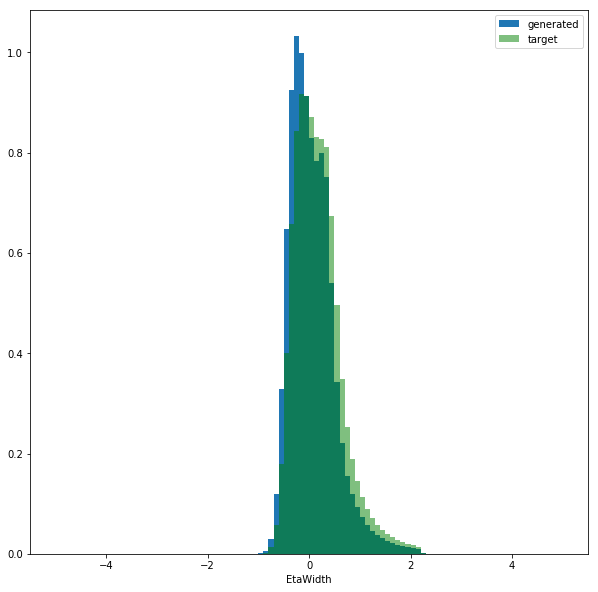

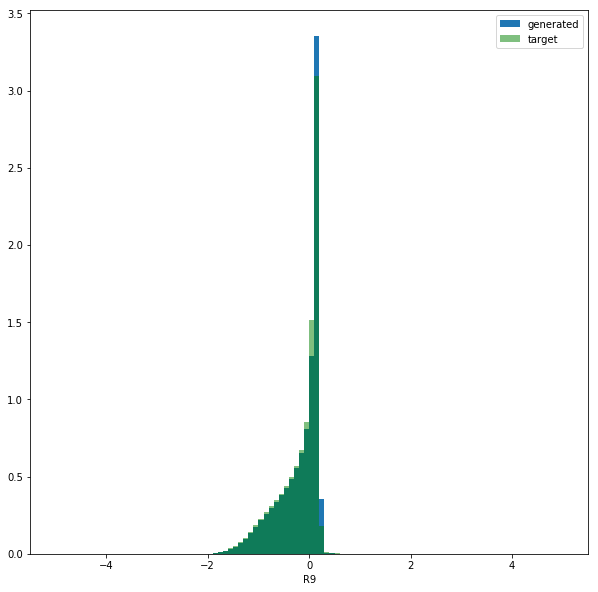

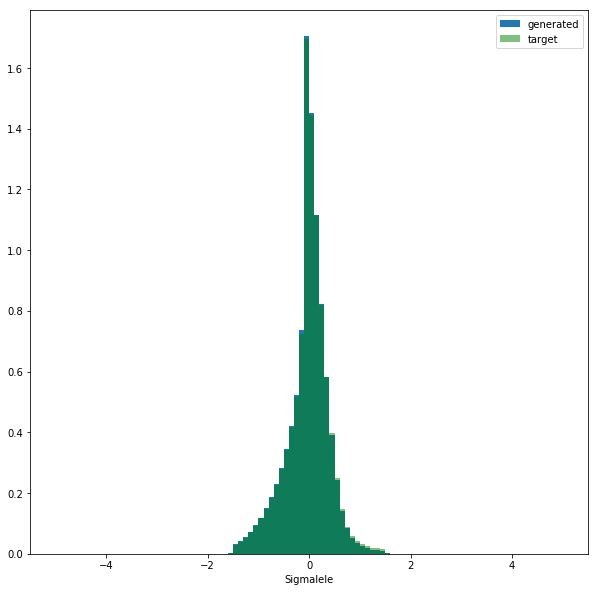

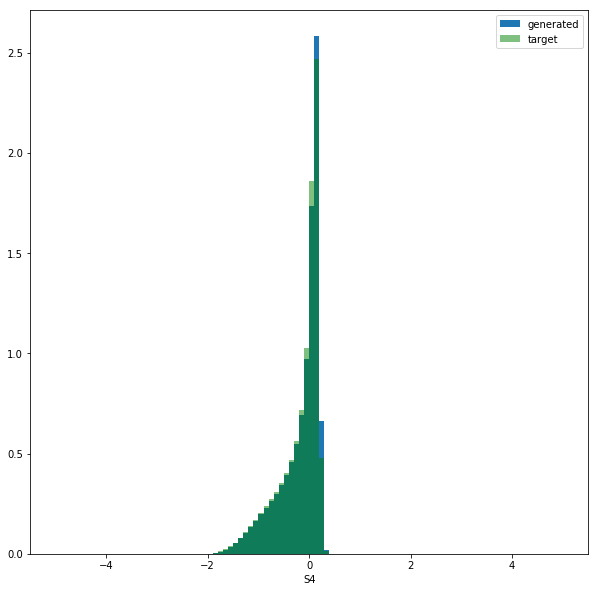

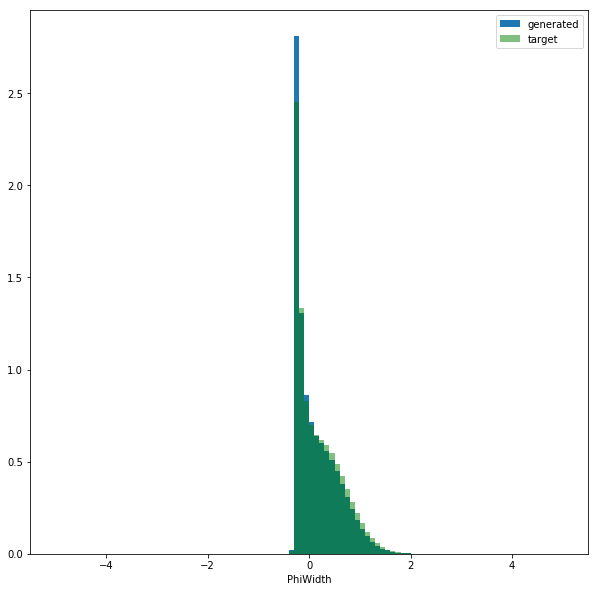

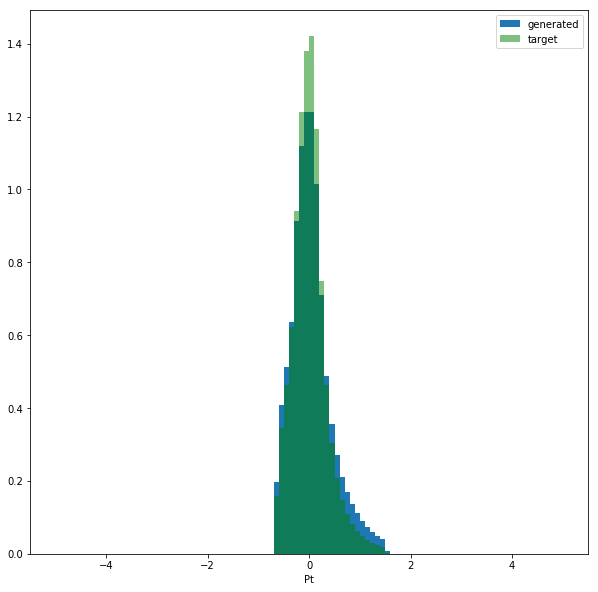

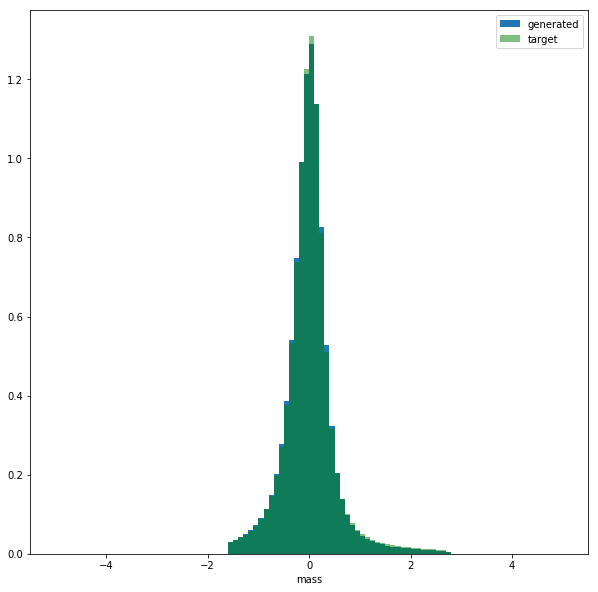

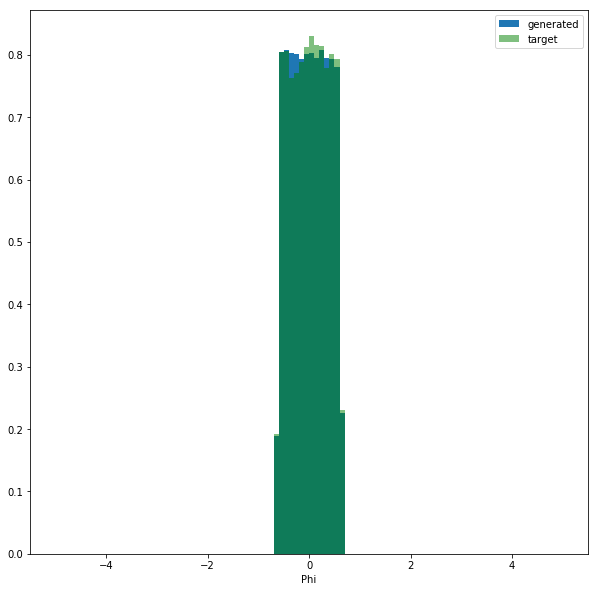

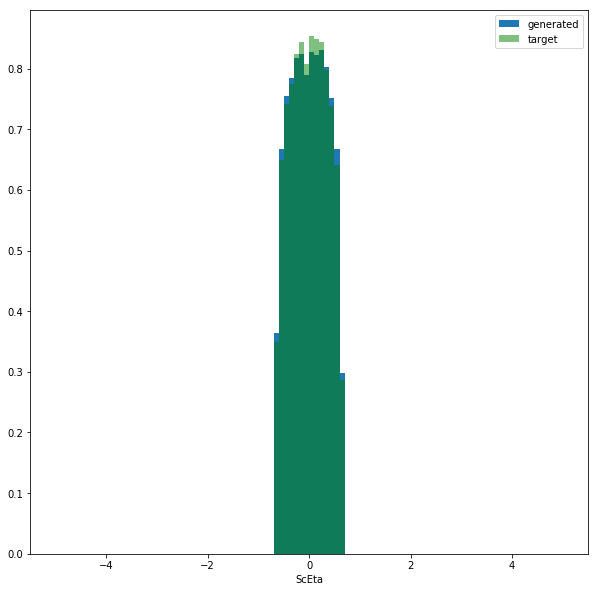

In [41]:
for ix in range(len(x_names)):
    plotting.plot_hists(data_x[:,0,ix],mc_x[:,0,ix],bins=100)#,range=[-3,3])
    plt.xlabel(x_names[ix])
    plt.show()

for ic in range(len(c_names)):
    plotting.plot_hists(data_c[:,0,ic],mc_c[:,0,ic],bins=100)#,range=[-3,3])
    plt.xlabel(c_names[ic])
    plt.show()
